# Homework 2

This homework focuses on **resampling** and **noise**.

This homework will explore linear regression and resampling techniques by analysing data from a database of glaciers. The database is *Glatilda* for [*Glacier Ice Thickness Database*](https://www.gtn-g.ch/data_catalogue_glathida/).

1. Data Statistics
2. Data prep (5 points)
2. Mapping (10 points)
3. Correlations between parameters (5 points)
4. Linear regression and resampling techniques (10 points)

## 1. Data Prep (5 points total)

### a) Download data (1 point) 
The database is saved on a GitLab repository that you may clone: https://gitlab.com/wgms/glathida.git



In [3]:
# answer
!git clone https://gitlab.com/wgms/glathida.git

fatal: destination path 'glathida' already exists and is not an empty directory.


### b) Import Python modules (1 point) 
Import pandas, geopandas, plotting, raster files,  numpy, netcdf

In [4]:
# solution
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt
import rasterio
import numpy as np
import netCDF4 as nc
import plotly.express as ex
import wget

### c) Read data (2 points)
Read the glacier data from the file ``glathida/data/glacier.csv`` into a pandas data frame, and decribe briefly the dataframe content and its first few lines.

In [5]:
# solution
t_path = "glathida/data/glacier.csv"
glacier = pd.read_csv("glathida/data/glacier.csv")
print(glacier.columns)
glacier.head()

Index(['id', 'survey_id', 'name', 'external_db', 'external_id', 'latitude',
       'longitude', 'date', 'max_date', 'area', 'mean_slope', 'mean_thickness',
       'mean_thickness_uncertainty', 'max_thickness',
       'max_thickness_uncertainty', 'number_points', 'number_profiles',
       'length_profiles', 'interpolation_method', 'flag', 'remarks'],
      dtype='object')


,id,survey_id,name,external_db,external_id,latitude,longitude,date,max_date,area,...,mean_thickness,mean_thickness_uncertainty,max_thickness,max_thickness_uncertainty,number_points,number_profiles,length_profiles,interpolation_method,flag,remarks
0,1,1,Isfallsglaciären,WGI,SE4B000E0006,67.91500,18.56800,1979-03-01,1979-03-31,1.3,...,72.0,NaN,220.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,Rabots glaciär,WGI,SE4B000E1016,67.91000,18.49600,1979-03-01,1979-03-31,4.1,...,84.0,NaN,175.0,NaN,NaN,10.0,NaN,NaN,NaN,NaN
2,3,1,Storglaciären,WGI,SE4B000E0005,67.90000,18.57000,1979-03-01,1979-03-31,3.1,...,99.0,NaN,250.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2,South Cascade Glacier,WGI,US2M00264006,48.35698,-121.05735,1975-01-01,1975-12-31,2.0,...,99.0,NaN,195.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,3,Athabasca Glacier,FOG,7,52.17540,-117.28400,NaN,NaN,3.8,...,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Explore the data with visualization**
Before making any inference of models with the data, we will start by exploring basic correlations among parameters by plotting. In particular, we will focus on ``mean_thickness``, ``area``, ``mean_slope`` parameters.



### d) Remove bad data (1 point)

The database may contain Nans and other "bad" values (welcome to the data world!). First we will clean the data by removing nans. We are mostly interested in the thickness, area, and slope



In [23]:
#answer below 
new_glacier = glacier.dropna(subset = ['mean_thickness', 'area', 'mean_slope'])
print(new_glacier)

       id  survey_id                 name external_db     external_id  \
32     33          9       Easton Glacier         FOG            1367   
33     34         10  Lemon Creek Glacier         FOG            3334   
34     35         11         Praviy Aktru         WGI    SU5A15106127   
35     36         11          Maliy Aktru         WGI    SU5A15106126   
36     37         11          Leviy Aktru         WGI    SU5A15106128   
..    ...        ...                  ...         ...             ...   
618  2111        187          Blekumbreen       GLIMS  G016068E78246N   
626  2119        193    Tuyuksu (central)       GLIMS  G077080E43049N   
630  2123        195       Aldegondabreen         RGI  RGI50-07.01079   
744  2240        209            Ariebreen         RGI  RGI60-07.00209   
832  2328        229    Austre Lovenbreen         RGI  RGI60-07.00496   

      latitude   longitude        date    max_date    area  ...  \
32   48.750000 -121.830000  1992-01-01  1992-12-31   2.9

## 2. Mapping glaciers (10 points)

Make a global map of the glaciers. Use either of the tools we learned in class:
* Geopandas, DEMs from NetCDFfiles (see chapter 2.4)
* Pandas and Plotly (see chapter 2.2). You may need to transform some of the series into log-spaced values for better visualization.

### Option 1: Tif and matplotlib

You can use the ``elevation`` data from the DEM seen in class. Download the DEM file (https://www.dropbox.com/s/j5lxhd8uxrtsxko/HYP_50M_SR.tif?dl=1)

In [8]:
# solution
wget.download('https://www.dropbox.com/s/j5lxhd8uxrtsxko/HYP_50M_SR.tif?dl=1')

'HYP_50M_SR (1).tif'


___Tips___: when plotting a image in ``matplotlib`` you need to add information about the physical dimensions of the image. You can calculate the ``bounds``.

In [7]:
elevation = rasterio.open('HYP_50M_SR.tif')
bounds = (elevation.bounds.left, elevation.bounds.right, \
          elevation.bounds.bottom, elevation.bounds.top)

We will use ``matplotlib.pyplot`` to show the raster image in the background (tips: use ``imshow()``. The raster image in matplotlib can only import one frame and not three (R, G, B) frames. We will first stack the three images together. 

In [8]:
red = elevation.read(1)
green = elevation.read(2)
blue = elevation.read(3)
pix = np.dstack((red, green, blue))

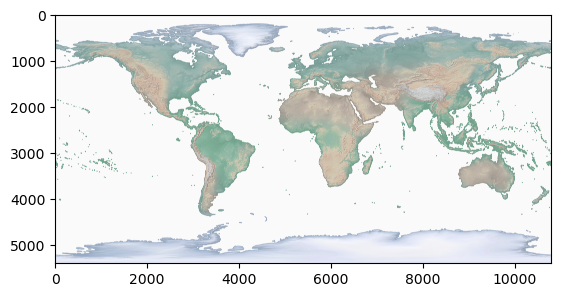

In [9]:
# solution
plt.imshow(pix)

## Option 2: Plotly

You may use plotly. For improved visibility, transform some of the data into log-spaced. You may add these transformed Series into the Pandas, and use them as input to plotly.

In [10]:

import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'vscode' # writes as standalone html, 
# pio.renderers.default = 'iframe' # writes files as standalone html, 
# pio.renderers.default = 'png' # writes files as standalone html, 
# try notebook, jupyterlab, png, vscode, iframe

In [11]:
# solution


## 3. Correlations between data parameters ( 5 points total)

Make plots to vizualise the correlation, or lack of, between all three data. Make at least three plots.

### a) Basic correlations using Matplotlib (2 points)

Make 3 plots using matplotlib to visualize slope, mean_thickness, and area. Use logscale to see the correlatons.

__Tips__: 
* Use the function ``scatter`` to plot the values of mean thickness, mean slope, area, and latitude. 
* use one of the dataframe columns as a color using the argument ``c``. You can also vary the ``colormap`` using the argument ``cmap``. Help on colormaps can be found here: https://matplotlib.org/stable/tutorials/colors/colormaps.html. Be mindful of Color-Vision Deficient readers and read *Crameri, F., Shephard, G.E. and Heron, P.J., 2020. The misuse of colour in science communication. Nature communications, 11(1), pp.1-10. https://doi.org/10.1038/s41467-020-19160-7* (find it on the class Gdrive). You can add a third "data" by choosing a marker color that scales with an other parameter. For instance, try coloring your marker with the ``LAT`` parameter to look at systematic latitudinal trends from the equator to the poles.
* Do not forget to adjust fontsize, figure size (at least 10,8), grid, labels with  of the features (example: km). ou may also explore the *logarithmic* correlations by mapping the axis from linear to logarithmic scale ``plt.xscale('log')``.

Text(0.5, 1.0, 'Log of Mean Slope vs Mean Thickness')

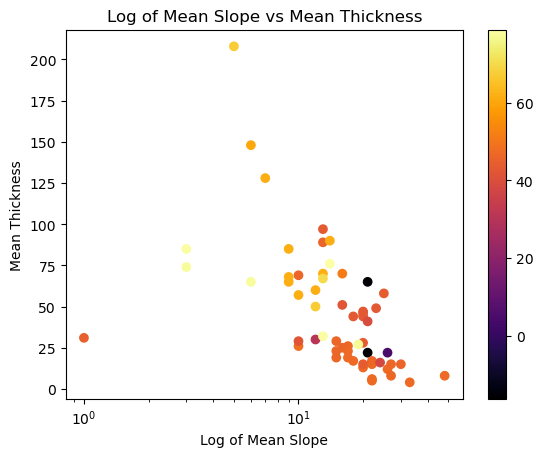

In [24]:
# Figure 1: Mean slope vs mean thickness
# solution
from matplotlib import colormaps
plt.scatter('mean_slope', 'mean_thickness', data = new_glacier, c = "latitude",  cmap = "inferno")
cbar = plt.colorbar()
plt.xscale('log')
plt.ylabel("Mean Thickness")
plt.xlabel("Log of Mean Slope")
plt.title("Log of Mean Slope vs Mean Thickness")

Text(0.5, 1.0, 'Log of Area vs Mean Thickness')

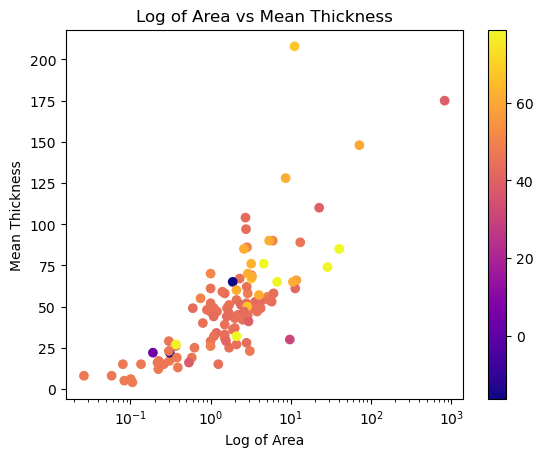

In [25]:
# Figure 2: area vs mean thickness
# solution
from matplotlib import colormaps
plt.scatter('area', 'mean_thickness', data = new_glacier, c = "latitude",  cmap = "plasma")
cbar = plt.colorbar()
plt.xscale('log')
plt.ylabel("Mean Thickness")
plt.xlabel("Log of Area")
plt.title("Log of Area vs Mean Thickness")

### b) 3D Scatter plot using Plotly (1 point)

Use the plotly ``scatter_3d`` plot. Make sure to change the pandas series for log scales.

/srv/conda/envs/notebook/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning:

divide by zero encountered in log

/tmp/ipykernel_91/3285580892.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_91/3285580892.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_91/3285580892.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

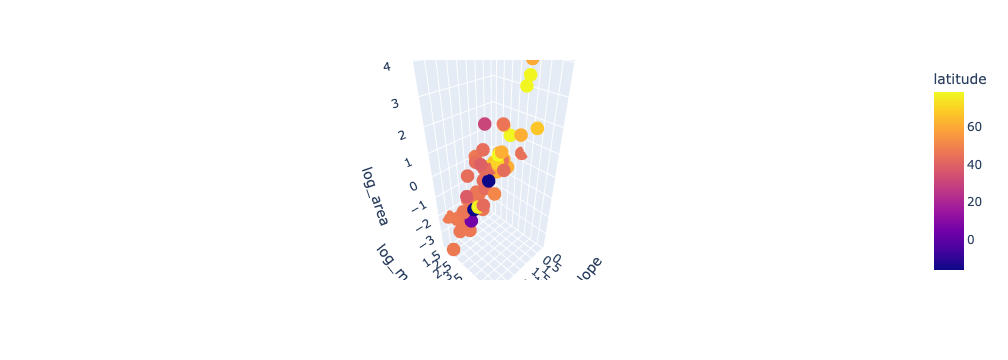

In [26]:
# solution

new_glacier["log_mean_slope"] = np.log(new_glacier["mean_slope"])
new_glacier["log_mean_thickness"] = np.log(new_glacier["mean_thickness"])
new_glacier["log_area"] = np.log(new_glacier["area"])

ex.scatter_3d(new_glacier, x = "log_mean_slope" , y = "log_mean_thickness", z = "log_area", color = "latitude")

### c) Pandas Correlation function (1 point)

You may use Pandas functionalities to explore correlation between data. Use the function ``corr`` on the dataframe and the matplotlib function ``matshow`` to plot a heatmap of the correlations

Text(0.5, 1.0, 'Correlation between Mean Thickness, Area, and Mean Slope')

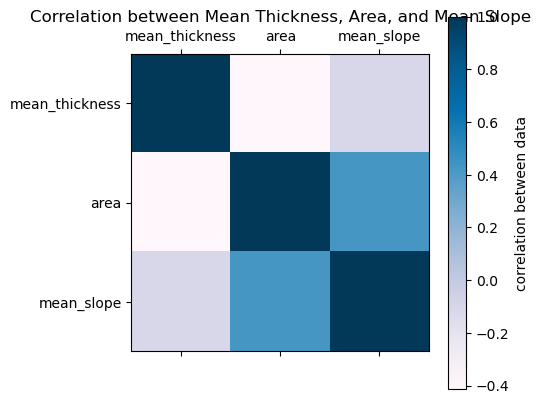

In [47]:
#solution
correlation_glacier = pd.DataFrame(new_glacier, columns = ['mean_slope', 'mean_thickness', 'area'])
correlation_glacier = correlation_glacier.corr()
plt.matshow(correlation_glacier, cmap = 'PuBu')
title_cols = ['mean_thickness','area','mean_slope']
plt.xticks(ticks=[0,1,2],labels=title_cols, ha='center')
plt.yticks(ticks=[0,1,2],labels=title_cols)
plt.colorbar(label='correlation between data')
plt.title('Correlation between Mean Thickness, Area, and Mean Slope')

### f) Seaborn Plotting (1 point)

Seaborn is a great python package for basic data anlytics. See documentation [here](!https://seaborn.pydata.org/). You can visualize the data by plotting data features against each other and explore visually data correlations.

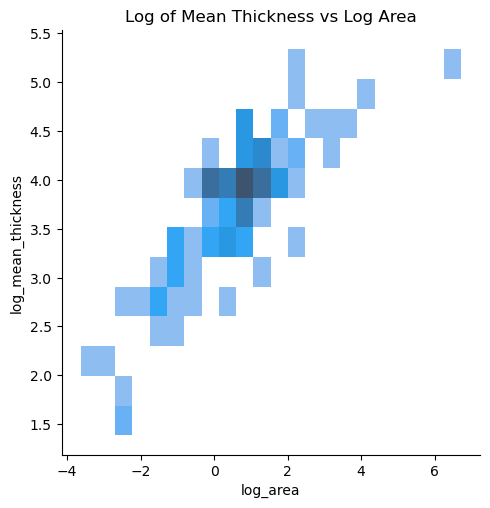

In [28]:
# solution
import seaborn as sns
sns.displot(data = new_glacier, x= 'log_area', y = 'log_mean_thickness').set(title='Log of Mean Thickness vs Log Area')


Discuss the basic correlations among the data. Do these correction make sense when you think about the shapes of glaciers?


These correlations make sense to me. The greater the Log Area, the greater the log mean thickness. This makes sense because, the smaller the glacier, the less thick it would be. The larger the glacier, the greater the mean thickness would be.

## 4. Linear Regression (10 points total counted in the next section)
You found from basic data visualization that the three parameters ``mean_slope``, ``mean_thickness``, and ``area`` are correlated. It does make physical sense because a *steep* glaciers is likely to be in the high mountains regions, hanging on the mountain walls, and thus be constrained, and conversely, a flat glacier is either at its valley, ocean terminus or on ice sheets.

### a) Simple linear regression (2 points)
We will now perform a regression between the parameters (or their log!). Linear regressions are models that can be imported from scikit-learn. Log/exp functions in numpy as ``np.log()`` and ``np.exp()``.
Remember that a linear regression is finding $a$ and $b$ knowing both $x$ and the data $y$ in $y = Ax +b$. We want to predict ice thickness from a crude estimate of the glacier area.

__Tips__: 
a. make sure that the dimensions are correct and that there is no NaNs and zeros.
b. Make sure to inport the scikit learn linear regression function and the error metrics.

In [29]:
# solution
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



Make a plot of the data and the linear regression your performed

Coefficient:  0.3873915101116367


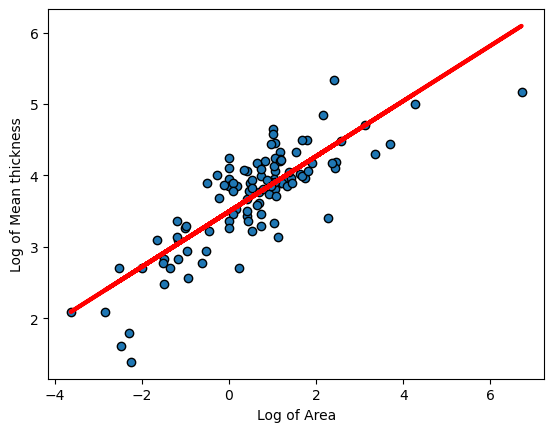

In [42]:
# solution
#new_glacier['log_mean_thickness'].isna().sum()
#new_glacier['log_mean_slope'].isna().sum()
#new_glacier['log_area'].isna().sum()

#convert data into numpy arrays
X = np.log(np.asarray(new_glacier['area'])).reshape(-1,1)
Y = np.log(np.asarray(new_glacier['mean_thickness'])).reshape(-1,1)
#print(Y)

#create linear regression object
regr = LinearRegression()

#perform fit
regr.fit(X,Y)

#predict fit
ypred = regr.predict(X)

# The coefficients
print('Coefficient: ', regr.coef_[0][0])

#plot
plt.scatter(X, Y, ec='k')
plt.plot(X, ypred,lw='3', color="red")
plt.xlabel('Log of Area')
plt.ylabel('Log of Mean thickness')
plt.show()

**Briefly comment on the quality of your fit and a linear regression (1 point)**

The fit looks good. There are a few outliers. The outliers are mostly on the ends. The outliers on the end create the downward regression trend. 


### b) Leave One Out Cross Validation linear regression (1 point)


Perform the LOCCV on the ``area`` and ``thickness`` values. Predict the ``thickness`` value knowing a ``area`` value. Use material seen in class. Make a plot of your fit.

In [45]:
from sklearn.model_selection import LeaveOneOut
# solution
loo = LeaveOneOut()
#initilize arrays
predictions = []
results = []

#set up and reshape
X = new_glacier['area']
y = new_glacier['mean_thickness']
X = X.values.reshape(-1,1)
regr = LinearRegression()

for train_index, test_index in loo.split(X):
    X_train, X_val = X[train_index], X[test_index]
    y_train, y_val = y[train_index], y[test_index]
    regr.fit(X_train,y_train)
    
    #predict
    train_ypred = regr.predict(X_train)
    y_pred = regr.predict(X_val) 
    
    predictions.append(train_ypred)
    results.append(y_pred)
    
    
plt.scatter(results, predictions, color = 'red')
plt.plot([min(resutls), max(results)], [min(results), max(results)], color='black')
plt.xlabel('Log of Mean Thickness')
plt.ylabel('Prediction of log of Mean Thickness')


KeyError: '[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 60, 61, 62, 63, 66, 69, 87, 88, 89, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109] not in index'

### c) Bootstrapping (1 point)

Perform the same analysis but using a bootstrapping technique. Output the mean and standard deviation of the slope. An illustration with a histogram  may help.

In [52]:
from sklearn.utils import resample
# solution

k=100

#initilize arrays
predictions_boot = []
results_boot = []

#convert data into numpy arrays
X = np.log(np.asarray(new_glacier['area'])).reshape(-1,1)
Y = np.log(np.asarray(new_glacier['mean_thickness'])).reshape(-1,1)

X = X.values.reshape(-1,1)
regr = LinearRegression()

for(i) in range(k):
    xb, yb = resample(X, Y, random_state=np.random.randint(1000))
    
    regr.fit(xb, yb)
    
    #predict
    ypred_boot = regr.predict(X)
    
    predictions_boot.append(ypred_boot)
    
    results_boot.append(Y.values)
    
predict_b = np.vstack(predict_b)
mean_predict = np.mean(predict_b, axis = 0)
plt.title('Bootstrapping log Mean Thickness vs log Area predictions')
plt.hist(predict_b.flatten(), bins=20, color='blue')
plt.xlabel('Log of Mean thickness')
plt.ylabel('log of Area')
plt.subplot(1, 2, 3)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

### d) Predict the thickness of a glacier (2 points)

Let assume that you measure a glacier of area 10 km$^2$. Can you use your bootstrap regression framework to provide a distribution of possible values of the ice thickness ? Output the mean and standard deviation of the predicted ice thickness.

In [53]:
# solution
k=100

#convert data into numpy arrays
X = np.log(np.asarray(new_glacier['area'])).reshape(-1,1)
Y = np.log(np.asarray(new_glacier['mean_thickness'])).reshape(-1,1)

